# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier



---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf
from sklearn.utils import shuffle
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import random
import cv2



#name of variables
training_file = 'train.p'
validation_file='valid.p'
testing_file = 'test.p'

#file loading
with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

    
#labeling    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

#printing
X_train, y_train = shuffle(X_train, y_train)
print('X_train:', len(X_train))
print('y_valid:', len(y_valid))
print('y_train:', len(y_train))
print('Dataset successfully saved: for training, validation and test.')


X_train: 34799
y_valid: 4410
y_train: 34799
Dataset successfully saved: for training, validation and test.


---

## Step 1: Dataset Summary & Exploration



### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

Printing data summary...:
Number of training examples = 34799
Number of validation examples = 4410
Number of test examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


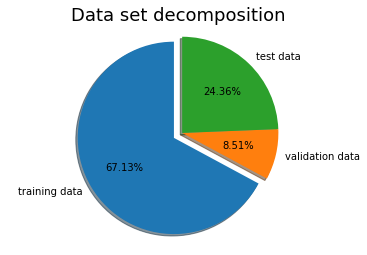

In [2]:
n_train = len(X_train)
n_validation = len(X_valid)
n_test = len(X_test)
image_shape =X_train.shape[1:4]

#reading names of classes
df = pd.read_csv('signnames.csv')
SignName = np.array(df['SignName'])
n_classes = len(df)
print('Printing data summary...:')

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of test examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)


#printing chart
labels = 'training data', 'validation data', 'test data'
sizes = [n_train, n_validation, n_test]

explode = (0.1, 0.0, 0) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%', shadow=True, startangle=90)
ax1.axis('equal')  
plt.title('Data set decomposition', fontsize=18)
plt.show()

### Include an exploratory visualization of the dataset

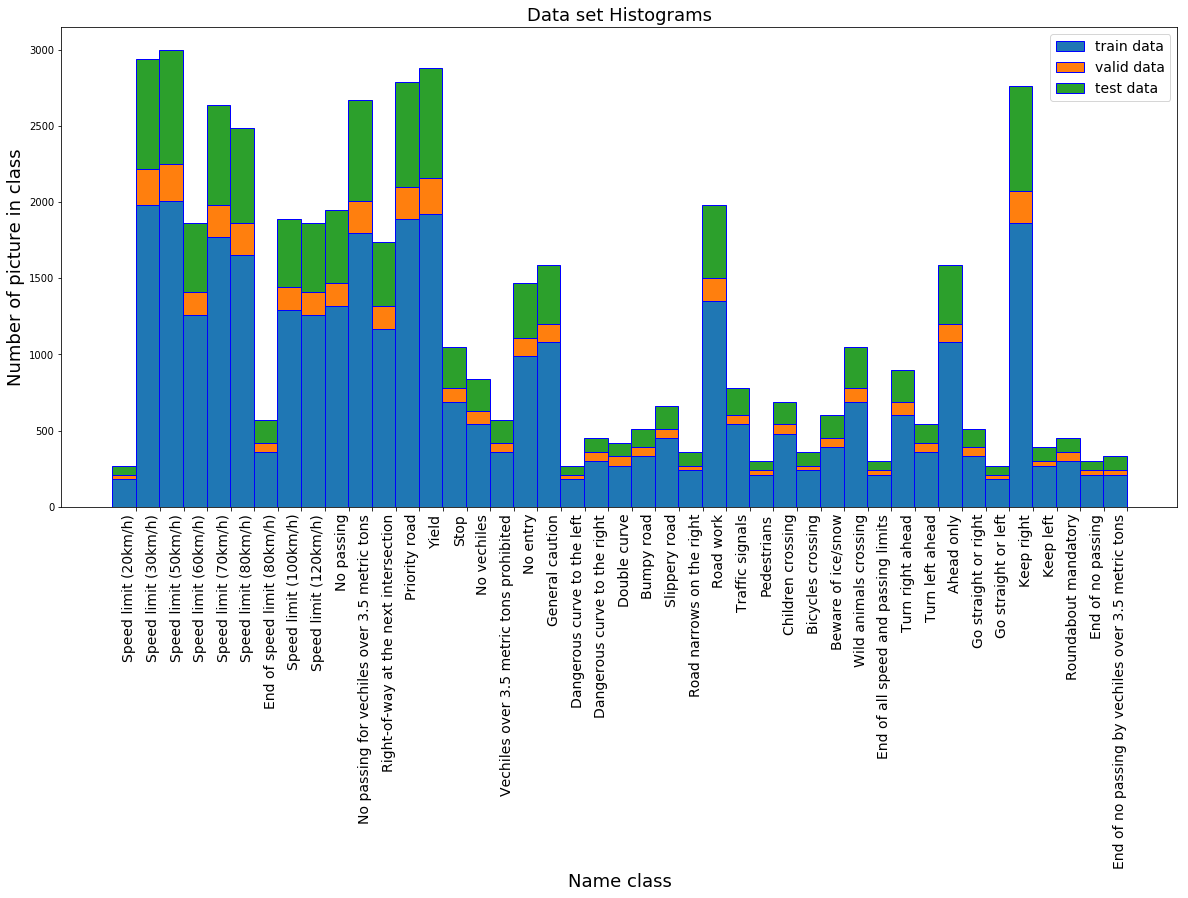

In [3]:

%matplotlib inline
#preparing the histogram
sign_classes, index, pics_in_class=np.unique(y_train, return_index=True, return_counts=True)
sign_classes2, index2, pics_in_class2=np.unique(y_test, return_index=True, return_counts=True)
sign_classes3, index3, pics_in_class3=np.unique(y_valid, return_index=True, return_counts=True)
plt.figure(figsize=(20,30))
plt.subplot(3,1,1)
ind=[]
x = np.arange(1, len(sign_classes)+0)


histogram=plt.hist([y_train,y_valid, y_test], bins = n_classes, histtype='bar', edgecolor='b', stacked=True,
                   label=['train data','valid data','test data'])

plt.ylabel('Number of picture in class',fontsize=18);
plt.xlabel('Name class',fontsize=18);

ap=[]
for i in range(len(sign_classes)):
    ap.append(histogram[1][i]+1)

    plt.xticks(ap, SignName,horizontalalignment='right', verticalalignment='top',rotation=90, fontsize=14)

plt.legend(fontsize=14)
plt.title('Data set Histograms', fontsize=18)

plt.show()










In [4]:
sign_classes, nr_items = np.unique(y_train, return_counts=True)

print("-----------------------------------------------------------")
print("| Class  |Nr pictures| Sign ")
print("-----------------------------------------------------------")

for ii in range(len(sign_classes)):
      print("| %-*s | %-*s   | %-*s " % (6, sign_classes[ii], 7, nr_items[ii], 3, SignName[ii]))  

-----------------------------------------------------------
| Class  |Nr pictures| Sign 
-----------------------------------------------------------
| 0      | 180       | Speed limit (20km/h) 
| 1      | 1980      | Speed limit (30km/h) 
| 2      | 2010      | Speed limit (50km/h) 
| 3      | 1260      | Speed limit (60km/h) 
| 4      | 1770      | Speed limit (70km/h) 
| 5      | 1650      | Speed limit (80km/h) 
| 6      | 360       | End of speed limit (80km/h) 
| 7      | 1290      | Speed limit (100km/h) 
| 8      | 1260      | Speed limit (120km/h) 
| 9      | 1320      | No passing 
| 10     | 1800      | No passing for vechiles over 3.5 metric tons 
| 11     | 1170      | Right-of-way at the next intersection 
| 12     | 1890      | Priority road 
| 13     | 1920      | Yield 
| 14     | 690       | Stop 
| 15     | 540       | No vechiles 
| 16     | 360       | Vechiles over 3.5 metric tons prohibited 
| 17     | 990       | No entry 
| 18     | 1080      | General caution 


----

## Step 2: Design and Test a Model Architecture



### Pre-process the Data Set (normalization, grayscale, etc.)

In [5]:
# Pre-process the Data Set (normalization, grayscale, etc.)
def grayscale(img):
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    return img

   
def normalize(x):
    a = 0.1
    b = 0.9
    x_min = 0
    x_max = 255
    
    return a + (x - x_min) * (b - a) / (x_max - x_min)


def preprocess(data, picture):
    if picture==True:
        gray_images = grayscale(data)
    else:
        gray_images = []
        for image in data:
            gray = grayscale(image)
            gray_images.append(gray)
        
    return np.array(gray_images)

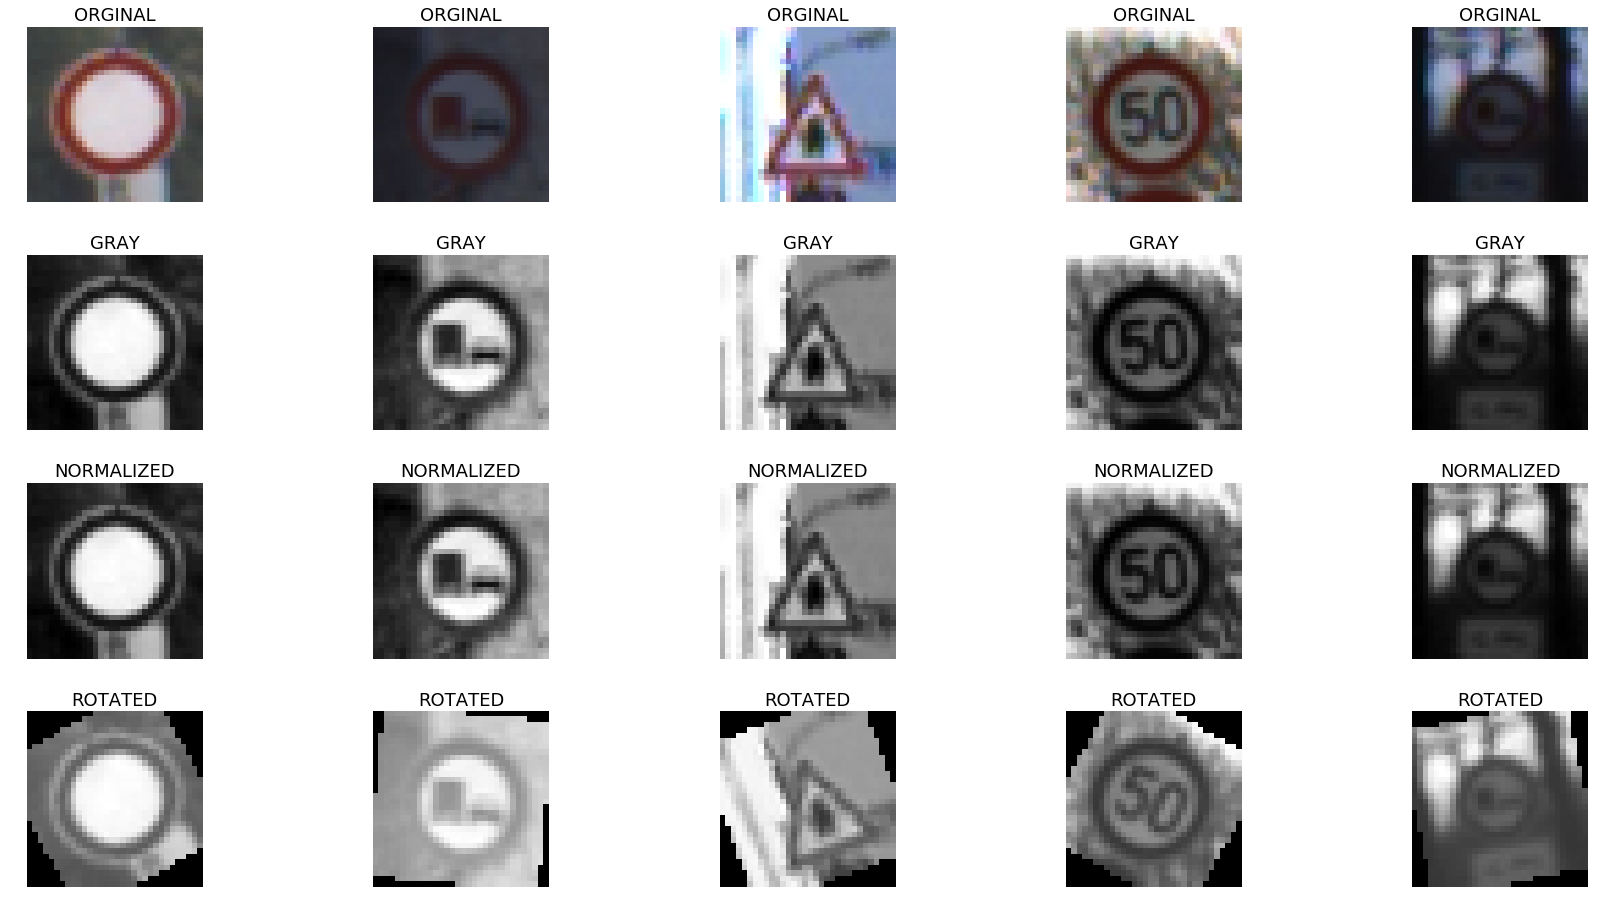

In [6]:
#printing randomly prreprocessed data
from numpy import newaxis
from scipy import ndimage
number_images = 5

sample_classes, sample_index, sample_pics_in_class=np.unique(y_train, return_index=True, return_counts=True)


fig = plt.figure(figsize=(30,60))
fig.subplots_adjust(bottom=0.1, hspace=0.3)

index_random_class=[]
index_random_pics=[]


for i in range(number_images):
 
   
    
    picture = np.where(y_train == i)

    index = random.randint(0, len(X_train))
    
    random_pics = X_train[random.randint(0, len(X_train))]
    
    
    
    fig.add_subplot(3*number_images, number_images, i+1)
    plt.imshow(random_pics)
    title = str('ORGINAL') 
    plt.title(title, fontsize=18)
    plt.axis('off')
    
    preprocess_image = preprocess(random_pics, True)

    fig.add_subplot(3*number_images, number_images, number_images+i+1)
    plt.imshow(preprocess_image,cmap='gray')
    title = str('GRAY') 
    plt.title(title, fontsize=18)
    #print('preprocess',preprocess_image.shape[0:2])
    plt.axis('off')
    
    #preprocess_image = preprocess_image[..., newaxis]
    normalize_image = normalize(preprocess_image)
    
    # perform normalization
    fig.add_subplot(3*number_images, number_images, 2*number_images+i+1)
    plt.imshow(normalize_image, cmap='gray')
    title = str('NORMALIZED') 
    plt.title(title, fontsize=18)
    plt.axis('off')
  
    
    # generate randomly pictures (rotate)
    theta = np.random.uniform(-30, 30)
    augmented= ndimage.rotate(normalize_image, theta, reshape=False)
    fig.add_subplot(3*number_images, number_images, 3*number_images+i+1)
    plt.imshow(augmented, cmap='gray')
    title = str('ROTATED') 
    plt.title(title, fontsize=18)
    plt.axis('off')
    
    
    
    
plt.show()

In [7]:

print('Preprocessing train and test datasets...')

#preprocessing
X_train = preprocess(X_train, False)
X_valid = preprocess(X_valid, False)
X_test = preprocess(X_test, False)

# slicing operation
X_train = X_train[..., newaxis]
X_valid = X_valid[..., newaxis]
X_test = X_test[..., newaxis]
#normalizing
X_train = normalize(X_train)
X_valid = normalize(X_valid) 
X_test = normalize(X_test) 


image_shape1 = X_train.shape
print("Processed training data shape =", image_shape1)
image_shape2 = X_valid.shape
print("Processed validating data shape =", image_shape2)
image_shape3 = X_test.shape
print("Processed testing data shape =", image_shape3)
print('Done')
#print('picture:',X_train[2][2][1])

Preprocessing train and test datasets...
Processed training data shape = (34799, 32, 32, 1)
Processed validating data shape = (4410, 32, 32, 1)
Processed testing data shape = (12630, 32, 32, 1)
Done


In [8]:

## Generate additional data 
from scipy import ndimage
from scipy.ndimage import gaussian_filter
import random
import cv2


y_orginal=y_train

#calculate how many classess, indexes and picture in each class
sign_classes, index, pics_in_class=np.unique(y_train, return_index=True, return_counts=True)

#print(len(sign_classes))
#print(index)
#print(pics_in_class)


max_pics = int(np.max(pics_in_class))
min_desired = int(max_pics)

#how many times we can enlarge data

factor=1
print('Generating new data.')


# Iterate through factor
for ii in range(factor):
    
        # Iterate through factor
    for i in range(len(sign_classes)):
    
        fake_X = []
        fake_y = []
        for j in range(pics_in_class[i]):
     
            picture = np.where(y_train == i)
            # define the random rotating angle
            theta = np.random.uniform(-30, 30)
            new_picture=X_train[picture][j]

            fake_X.append(ndimage.rotate(new_picture, theta, reshape=False))
            fake_y.append(i)
       
        X_train = np.append(X_train, np.array(fake_X), axis=0)
        y_train = np.append(y_train, np.array(fake_y), axis=0)
       
        
print('TOTAL pictures after generation of fake data:', X_train.shape, 'pictures.')




Generating new data.
TOTAL pictures after generation of fake data: (69598, 32, 32, 1) pictures.


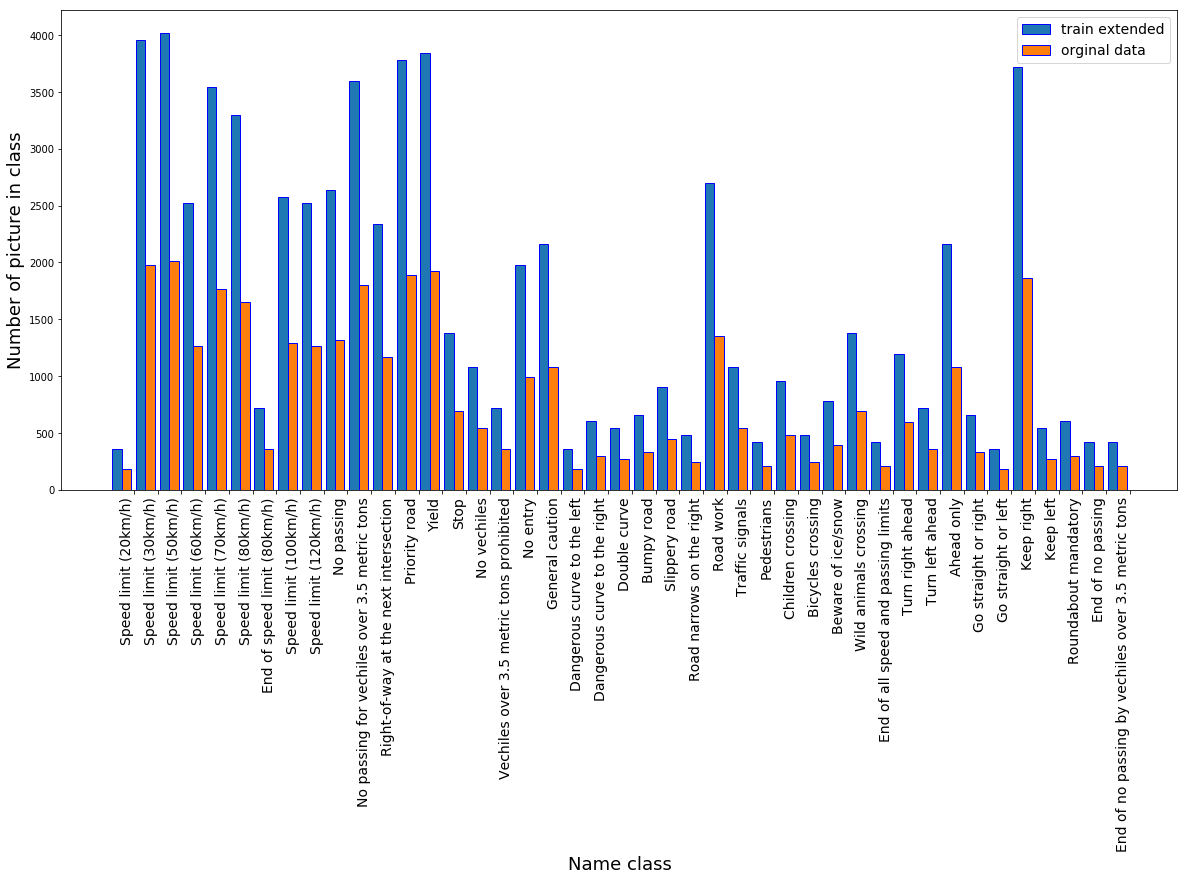

In [9]:

# Visualizations of data after generating fake data
%matplotlib inline

#calculate how many classess, indexes and picture in each class
sign_classes, index, pics_in_class=np.unique(y_train, return_index=True, return_counts=True)

plt.figure(figsize=(20,30))
plt.subplot(3,1,1)
ind=[]
x = np.arange(1, len(sign_classes)+0)


histogram=plt.hist([y_train,y_orginal], bins = n_classes, edgecolor='b', stacked=False,
                   label=['train extended','orginal data'])
#plt.bar([sign_classes,sign_classes2,sign_classes3], [pics_in_class,pics_in_class2,pics_in_class3], width=0.4, bottom=None, hold=None, data=None)
plt.ylabel('Number of picture in class',fontsize=18);
plt.xlabel('Name class',fontsize=18);

ap=[]
for i in range(len(sign_classes)):
    ap.append(histogram[1][i]+1)

    plt.xticks(ap, SignName,horizontalalignment='right', verticalalignment='top',rotation=90, fontsize=14)

plt.legend(fontsize=14)

plt.show()
sign_classes, index, pics_in_class=np.unique(y_train, return_index=True, return_counts=True)
sign_classes_org, index_org, pics_in_class_org=np.unique(y_orginal, return_index=True, return_counts=True)
#print('After', pics_in_class)
#print('Before', pics_in_class_org)

### Model Architecture

In [10]:

import tensorflow as tf
# The below is only necessary to reset if the notebook has not been shutdown
tf.reset_default_graph()

EPOCHS = 100
BATCH_SIZE = 150

from tensorflow.contrib.layers import flatten

def neural_network(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. 
    conv_layer_1_weight = tf.Variable(tf.truncated_normal(shape = (5, 5, 1, 32), mean = mu, stddev = sigma))
    
    conv_layer_1_bias = tf.Variable(tf.zeros(32))
   
    global conv_layer_1
    conv_layer_1 = tf.nn.conv2d(x, conv_layer_1_weight, strides=[1, 1, 1, 1], padding='VALID') + conv_layer_1_bias
    
    # Activation
   
    conv_layer_1 = tf.nn.relu(conv_layer_1)
    
    # Pooling. 
    conv_layer_1 = tf.nn.max_pool(conv_layer_1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Layer 2: Convolutional.

    conv_layer_2_weight = tf.Variable(tf.truncated_normal(shape = (3, 3, 32, 32), mean = mu, stddev = sigma))
    conv_layer_2_bias = tf.Variable(tf.zeros(32))
   
    
    global conv_layer_2
    conv_layer_2 = tf.nn.conv2d(conv_layer_1, conv_layer_2_weight, strides=[1, 1, 1, 1], padding='VALID') + conv_layer_2_bias
    
    # Activation 
    conv_layer_2 = tf.nn.relu(conv_layer_2)
    
    # Pooling. 
    conv_layer_2 = tf.nn.max_pool(conv_layer_2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten 
    flat = tf.contrib.layers.flatten(conv_layer_2)
    
    # Layer 3: Fully Connected. 
    
    fully_connected_1_weight = tf.Variable(tf.truncated_normal(shape = (1152, 240), mean = mu, stddev = sigma))
    
    fully_connected_1_bias = tf.Variable(tf.zeros(240))
   
    fully_connected_1 = tf.matmul(flat, fully_connected_1_weight) + fully_connected_1_bias
    
    # Activation
    fully_connected_1 = tf.nn.relu(fully_connected_1)
    
    # Dropout, to prevent overfitting
    fully_connected_1 = tf.nn.dropout(fully_connected_1, keep_prob)

    # Layer 4: Fully Connected. 
    
    fully_connected_2_weight = tf.Variable(tf.truncated_normal(shape = (240, 84), mean = mu, stddev = sigma))
    fully_connected_2_bias = tf.Variable(tf.zeros(84))
   

    fully_connected_2 = tf.matmul(fully_connected_1, fully_connected_2_weight) + fully_connected_2_bias
    
    # Activation.
    fully_connected_2 = tf.nn.relu(fully_connected_2)
    
    # Dropout
    fully_connected_2 = tf.nn.dropout(fully_connected_2, keep_prob)
    
    # Layer 5 Fully Connected. 
    
    fully_connected_3_weight = tf.Variable(tf.truncated_normal(shape = (84, 43), mean = mu, stddev = sigma))
    fully_connected_3_bias = tf.Variable(tf.zeros(43))
   
    logits = tf.matmul(fully_connected_2, fully_connected_3_weight) + fully_connected_3_bias
    
    return logits

In [11]:
# Set placeholder variables for x, y, and the keep_prob for dropout
# Also, one-hot encode y
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)

In [12]:
# Setting learning rate, loss functions, and optimizer
rate = 0.001

logits = neural_network(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [13]:
# The below is used in the validation part of the neural network
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy =  sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob : 1})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Train, Validate and Test the Model

In [14]:
### Training the model

save_file = './model_ok'
saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            loss = sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob : 0.7})
            #0.7
        training_accuracy = evaluate(X_train, y_train)    
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    # Save the model
    saver.save(sess, save_file)
    print('Trained Model Saved.')

Instructions for updating:
Use `tf.global_variables_initializer` instead.
Training...

EPOCH 1 ...
Training Accuracy = 0.826
Validation Accuracy = 0.815

EPOCH 2 ...
Training Accuracy = 0.922
Validation Accuracy = 0.878

EPOCH 3 ...
Training Accuracy = 0.963
Validation Accuracy = 0.914

EPOCH 4 ...
Training Accuracy = 0.976
Validation Accuracy = 0.927

EPOCH 5 ...
Training Accuracy = 0.982
Validation Accuracy = 0.922

EPOCH 6 ...
Training Accuracy = 0.987
Validation Accuracy = 0.938

EPOCH 7 ...
Training Accuracy = 0.990
Validation Accuracy = 0.939

EPOCH 8 ...
Training Accuracy = 0.991
Validation Accuracy = 0.947

EPOCH 9 ...
Training Accuracy = 0.993
Validation Accuracy = 0.943

EPOCH 10 ...
Training Accuracy = 0.995
Validation Accuracy = 0.955

EPOCH 11 ...
Training Accuracy = 0.996
Validation Accuracy = 0.952

EPOCH 12 ...
Training Accuracy = 0.996
Validation Accuracy = 0.947

EPOCH 13 ...
Training Accuracy = 0.997
Validation Accuracy = 0.957

EPOCH 14 ...
Training Accuracy = 0.998

In [15]:
# Launch the model on the test data
with tf.Session() as sess:
    saver.restore(sess, save_file)

   
    test_accuracy = sess.run(accuracy_operation, feed_dict={x: X_test, y: y_test, keep_prob : 1})

print('Test Accuracy: {}'.format(test_accuracy))

Test Accuracy: 0.9589869976043701


---

## Step 3: Test a Model on New Images



### Load and Output the Images

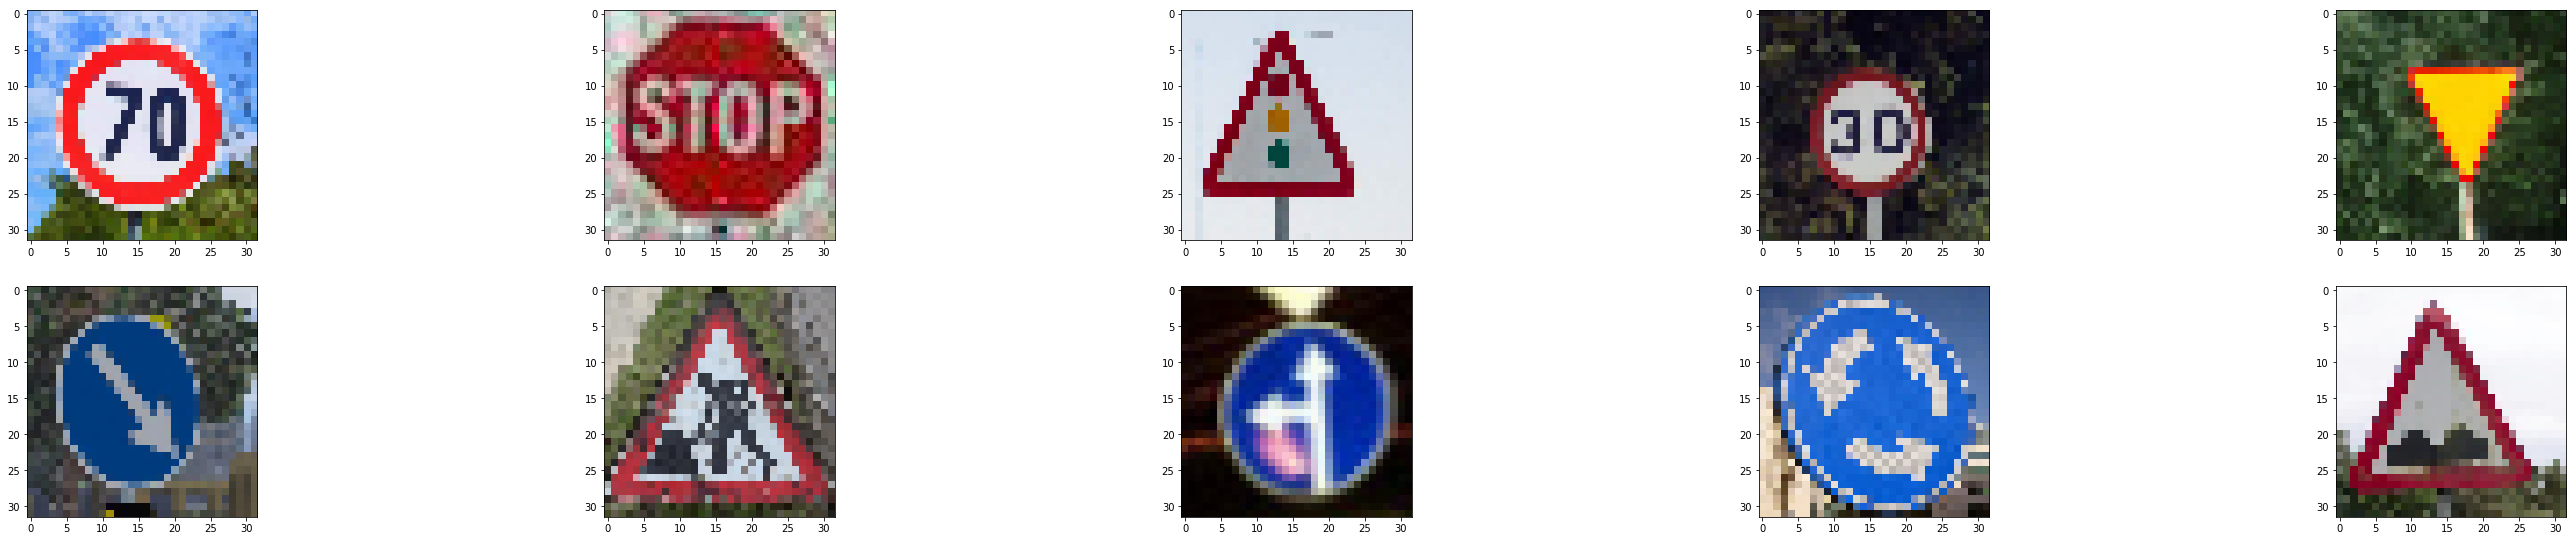

Dataset successfully saved
Printing data...
size of the images:  (10, 32, 32, 3)


In [16]:
### Load the images from the web. Plotting 

import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
number_images = 5

#print(os.listdir("test_images/"))
newx,newy= 32,32
image_dir = os.listdir(os.getcwd() + "/test_images/")

image_data=[]

fig = plt.figure(figsize=(50,50))
#fig.subplots_adjust(bottom=0.1, hspace=0.1)
i=0
for image in image_dir:
    oriimage = mpimg.imread('test_images/' + image)
    newimage = cv2.resize(oriimage,(newx,newy))
    #newimage=oriimage
    image_data.append(newimage)
    
    fig.add_subplot(2*number_images, number_images, number_images+i+1)
    
    plt.imshow(newimage)
    #plt.show()
    i=i+1
plt.show()
check_data = np.array(image_data)
print('Dataset successfully saved')
print('Printing data...')
print('size of the images: ',check_data.shape)





### Predict the Sign Type for Each Image

In [17]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.



from numpy import newaxis
print('Preprocessing train and test datasets...')
#X_train_preprocessed = preprocess_set(X_train)
#X_valid_preprocessed = preprocess_set(X_valid)
#X_test_preprocessed = preprocess_set(X_test)

check_data = preprocess(check_data, False)
check_data = check_data[..., newaxis]
check_data = normalize(check_data) 

#y_train_preprocessed = one_hot_encoding(y_train, depth = n_classes)
#y_test_preprocessed = one_hot_encoding(y_test, depth = n_classes)
check_data_shape = check_data.shape
print("Processed training data shape =", check_data_shape)

print('Done')




Preprocessing train and test datasets...
Processed training data shape = (10, 32, 32, 1)
Done


### Analyze Performance

In [18]:
#performing the prediction
with tf.Session() as sess:
    saver.restore(sess, save_file)

    predict_data = sess.run(tf.argmax(logits, 1), feed_dict={x: check_data, keep_prob: 1.0})
    
    print('predicted data:',predict_data )


b = np.array(df['SignName'])

#printing the prediction for 10 pictures
for i in range(len(predict_data)):
    nr=predict_data[i]
    print('nr:',i,',','sign name:',b[nr])




predicted data: [ 4 14 24  1 13 38 36 37 40 22]
nr: 0 , sign name: Speed limit (70km/h)
nr: 1 , sign name: Stop
nr: 2 , sign name: Road narrows on the right
nr: 3 , sign name: Speed limit (30km/h)
nr: 4 , sign name: Yield
nr: 5 , sign name: Keep right
nr: 6 , sign name: Go straight or right
nr: 7 , sign name: Go straight or left
nr: 8 , sign name: Roundabout mandatory
nr: 9 , sign name: Bumpy road


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

Image 0 probabilities: [  1.00000000e+00   5.52280232e-22   2.87589050e-22   2.30149917e-23
   9.58997692e-24] 
 and predicted classes: [4 8 0 5 1]
Image 1 probabilities: [ 0.94129169  0.02197706  0.02058637  0.00590269  0.0033296 ] 
 and predicted classes: [14 17 12 22 13]
Image 2 probabilities: [  9.22828913e-01   7.71711096e-02   2.07318660e-08   1.88845029e-08
   4.99072006e-10] 
 and predicted classes: [24 22 25 18 29]
Image 3 probabilities: [  9.99868274e-01   6.06295689e-05   5.99186424e-05   9.50402409e-06
   1.11929626e-06] 
 and predicted classes: [ 1  5  3  4 31]
Image 4 probabilities: [  1.00000000e+00   1.49302889e-29   1.13675943e-37   1.54183469e-40
   4.04274607e-41] 
 and predicted classes: [13 12 35  3 15]
Image 5 probabilities: [  9.99972463e-01   2.74813847e-05   1.88739909e-11   1.61246532e-13
   2.57986690e-15] 
 and predicted classes: [38 34 17 13 14]
Image 6 probabilities: [  9.94959593e-01   4.72239684e-03   3.16226389e-04   9.54108486e-07
   5.38273980e-07] 
 

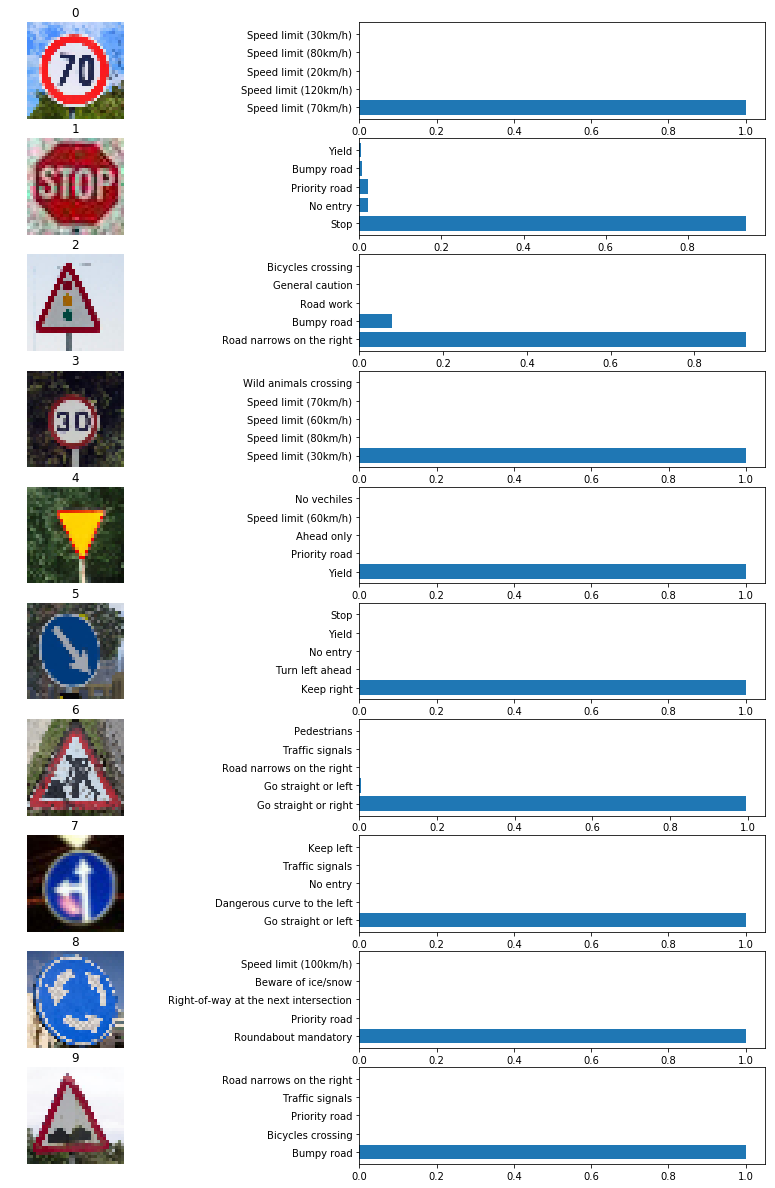

In [19]:
### Printing out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 



with tf.Session() as sess:
    saver.restore(sess, save_file)

    probability = sess.run(tf.nn.softmax(logits), feed_dict={x: check_data, keep_prob : 1.0})
    probability_selected = sess.run(tf.nn.top_k(probability, k=5, sorted=True))
    
for i in range(len(probability_selected[0])):
    print('Image', i, 'probabilities:', probability_selected[0][i], '\n and predicted classes:', probability_selected[1][i])
    
plt.figure(figsize=(16, 21))
for i in range(10):
    plt.subplot(10, 2, 2*i+1)
    plt.imshow(image_data[i]) 
    plt.title(i)
    plt.axis('off')
    plt.subplot(10, 2, 2*i+2)
    plt.barh(np.arange(1, 6, 1), probability_selected.values[i, :])
    labs=[b[j] for j in probability_selected.indices[i]]
    plt.yticks(np.arange(1, 6, 1), labs)
plt.show()


### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images




In [20]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

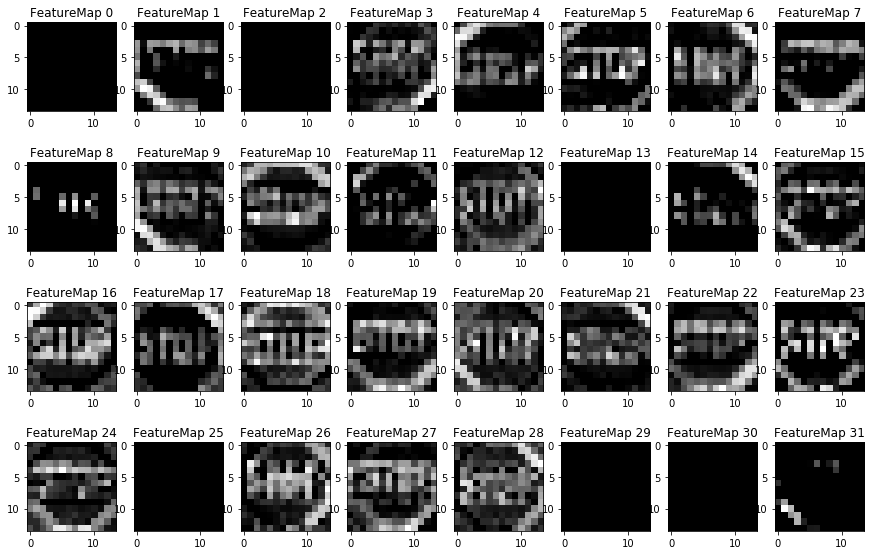

In [21]:

with tf.Session() as sess:
    #saver = tf.train.import_meta_graph('lenet.meta')
    #saver.restore(sess,tf.train.latest_checkpoint('./'))
    saver.restore(sess, save_file)
    visualize_this=outputFeatureMap([check_data[1]],conv_layer_1)